# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**:

**RA**: 


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [693]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *

In [694]:
# mostrar todas as colunas
pd.set_option("display.max_columns", None)

In [695]:
train_data = pd.read_csv("./data/train.csv")
data = pd.read_csv("./data/RHP_data.csv")

train_data = data.merge(train_data, on="Id", how="right")

display(train_data)

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,19.0,11/07/05,13/12/99,5.79,SB,Normais,110.0,80.0,HAS-1 PAD,Normal,ausente,100,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
1,17249,32.0,0,NaN,12/02/04,10/06/92,12.11,GS,Normais,100.0,60.0,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,Masculino,5 - Parecer cardiológico,NaN,Anormal
2,4483,13.0,87,17.0,22/12/03,05/11/01,2.21,SulAmerica,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
3,6830,11.0,0,NaN,11/12/06,26/05/05,1.6,SA,Normais,NaN,NaN,Não Calculado,Normal,ausente,100,NaN,NaN,F,1 - Cardiopatia já estabelecida,1 - Cardiopatia congenica,Normal
4,11652,42.4,136,23.0,23/03/01,03/03/01,0.06,NaN,Normais,100.0,60.0,Não Calculado,Normal,ausente,78,Assintomático,NaN,F,5 - Parecer cardiológico,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14722,16822,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#VALUE!,NaN,NaN,NaN,NaN,NaN,Indeterminado,NaN,NaN,NaN
14723,3249,30.0,113,23.0,17/05/06,01/08/01,4.97,Medial,Normais,105.0,70.0,Pre-Hipertensão PAD,Normal,sistólico,92,Dispneia,Palpitacao,F,6 - Suspeita de cardiopatia,6 - Dispnéia,Anormal
14724,3207,25.8,130,15.0,03/12/09,07/07/02,7.69,CAMED,Normais,90.0,55.0,Normal,Normal,ausente,78,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Normal
14725,4336,19.0,0,NaN,12/06/08,03/05/05,3.23,NaN,Normais,100.0,50.0,Não Calculado,Normal,ausente,100,Assintomático,NaN,M,5 - Parecer cardiológico,NaN,Normal


#### Após carregas os dados, iremos fazer uma breve análise do que cada uma das colunas representa.

* Peso: representa o peso, em Kg, de cada indivíduo.

* Altura: representa a altura, em cm, de cada indivíduo.

* IMC: representa o índice de massa corporal do paciente, índice que representa se o paciente estáem seu peso ideal ou não. É calculado pelo peso (em metros) dividido pela altura elevada ao quadrado.

* Atendimento: indica a data em que foi feito o atendimento do paciente.

* DN: data em que a declaração de nascido vivo do paciente foi escrita.

* Idade: representa a idade do paciente, sendo os anos representados por um valor real.

* Convênio: Indica qual o convênio do cliente.

* Pulsos: Indica a qualidade da circulação arterial. Pulsos fracos ou ausentes podem sugerir problemas como obstrução arterial ou insuficiência cardíaca.

* PA Sistolica: valor mais alto (medido em mmHg) que aparece durante uma aferição de pressão. Representa a pressão exercida nas artérias durante a contração do coração (sístole). Valores elevados indicam hipertensão arterial, enquanto valores muito baixos podem sugerir hipotensão.

* PA Diastolica: valor mais baixo (medido em mmHg) que aparece durante uma aferição de pressão. Reflete a pressão arterial durante o relaxamento do coração (diástole). É usada junto com a PA sistólica para diagnosticar hipertensão.

* PPA (Pressão de Pulso Arterial): Diferença entre a pressão arterial sistólica e diastólica. Indica a rigidez arterial. Valores elevados podem estar associados a doenças cardiovasculares.

* B2: Segundo Ruído Cardíaco, representa o som do fechamento das válvulas aórtica e pulmonar. 

* Sopro: Presença de ruídos anormais detectados durante a ausculta cardíaca. 

* FC (Frequência Cardíaca): número de batimentos cardíacos por minuto (bpm). Frequências muito altas (taquicardia) ou baixas (bradicardia) podem indicar problemas cardíacos.

* HDA1 (Histórico de doenças atual 1): informações detalhadas sobre o principal problema clínico atual.

* HDA2 (Histórico de doenças atual 2): informações adicionais sobre o problema clínico ou outras condições associadas.

* Sexo: genêro biológico do paciente.

* Motivo 1: principal razão para a consulta.

* Motivo 2: razão secundária para a consulta.

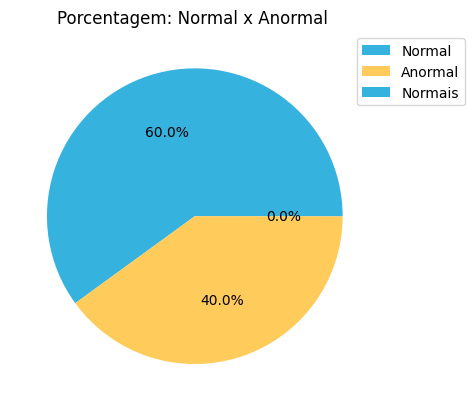

In [696]:

colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [697]:
print(f"Quantidade de amostras Normais: {sum(train_data['CLASSE'] == 'Normal')}")
print(f"Quantidade de amostras Anormais: {sum(train_data['CLASSE'] == 'Anormal')}")

Quantidade de amostras Normais: 8137
Quantidade de amostras Anormais: 5421


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

In [698]:
substituir(train_data, "CLASSE", "Normais", "Normal")

In [699]:
normal_data = train_data[train_data["CLASSE"] == "Normal"]

In [700]:
normal_data["nan_count"] = normal_data.isna().sum(axis=1)
normal_data = normal_data.sort_values(by="nan_count", ascending=False)

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_6308\3752332633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data["nan_count"] = normal_data.isna().sum(axis=1)


In [701]:
normal_data_reduced = normal_data.iloc[0:2716,:]

In [702]:
train_data = train_data[~train_data["Id"].isin(normal_data_reduced["Id"])]

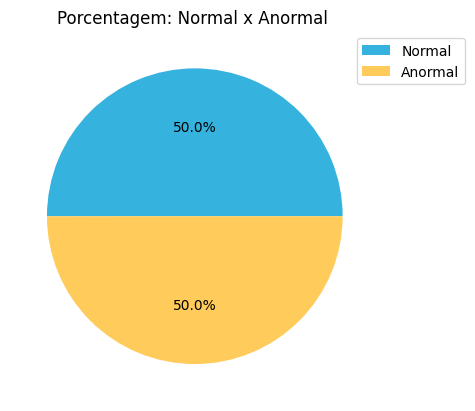

In [703]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [704]:
train_data = train_data.drop(columns=["Atendimento", "DN", "Convenio"])

In [705]:
converter_numeric(train_data, "FC")
converter_numeric(train_data, "IDADE")

In [706]:
peso_invalido = train_data[train_data["Peso"] < 0]

train_data = train_data.drop(peso_invalido.index)

In [707]:
altura_invalida = train_data[train_data["Altura"] < 40]

train_data = train_data.drop(altura_invalida.index)

In [708]:
idade_invalida = train_data[(train_data["IDADE"] <= 0) | (train_data["IDADE"] > 19)]

train_data = train_data.drop(idade_invalida.index)

In [709]:
pa_sistolica_invalida = train_data[
    (train_data["PA SISTOLICA"] > 500) | (train_data["PA SISTOLICA"] < 40)
]

train_data = train_data.drop(pa_sistolica_invalida.index)

In [710]:
pa_diastolica_irreal = train_data[train_data["PA DIASTOLICA"] < 30]

train_data = train_data.drop(pa_diastolica_irreal.index)

In [711]:
fc_irreal = train_data[(train_data["FC"] > 220) | (train_data["FC"] < 60)]

train_data = train_data.drop(fc_irreal.index)

In [712]:
colunas_numericas = ["Peso", "Altura", "IDADE"]

# Primeiro usa a função para retornar todas as amostras que são outliners
outliners = identifica_outliners(train_data, colunas_numericas)

In [713]:
train_data = train_data.drop(outliners[outliners].index)

In [714]:
train_data["PA DIASTOLICA"] = fill_na_mediana(train_data, "PA DIASTOLICA")
train_data["PA SISTOLICA"] = fill_na_mediana(train_data, "PA SISTOLICA")
train_data["FC"] = fill_na_mediana(train_data, "FC")

In [715]:
train_data["Peso"] = fill_na_mediana(train_data, "Peso")
train_data["Altura"] = fill_na_mediana(train_data, "Altura")
train_data["IDADE"] = fill_na_mediana(train_data, "IDADE")

In [716]:
altura_aux = train_data["Altura"] / 100


train_data["IMC"] = train_data["Peso"] / np.power(altura_aux, 2)

In [ ]:
train_data['PAM'] = train_data['PA DIASTOLICA'] + ((train_data['PA SISTOLICA'] - train_data['PA DIASTOLICA'] / 3))

In [ ]:
train_data['PP'] = train_data['PA SISTOLICA'] - train_data['PA DIASTOLICA']

In [717]:
train_data['PA RATE'] = (train_data['PA SISTOLICA']  - train_data['PA DIASTOLICA']) 

In [718]:
substituir(train_data, "PULSOS", "NORMAIS", "Normais")
substituir(train_data, "PULSOS", "AMPLOS", "Amplos")

In [719]:
substituir(train_data, "SOPRO", "sistólico", "Sistólico")
substituir(train_data, "SOPRO", "contínuo", "Contínuo")

In [720]:
substituir(train_data, "SEXO", "Masculino", "M")
substituir(train_data, "SEXO", "masculino", "M")

substituir(train_data, "SEXO", "Feminino", "F")

In [721]:
train_data = train_data.dropna(subset=["PULSOS"])

In [722]:
train_data = train_data.dropna(subset=["B2"])

In [723]:
train_data = train_data.dropna(subset=["HDA 1"])

In [724]:
train_data["HDA2"] = train_data["HDA2"].fillna("Assintomático")

In [725]:
train_data = train_data.dropna(subset=["SEXO"])

In [726]:
train_data = train_data.dropna(subset=["MOTIVO1"])

In [727]:
train_data["MOTIVO2"] = train_data["MOTIVO2"].fillna(train_data['MOTIVO2'].mode()[0])

In [728]:
train_data["PPA"] = train_data["PPA"].replace("#VALUE!", np.nan)

In [729]:
train_data = train_data.dropna(subset=["PPA"])

In [730]:
train_data = train_data.dropna(subset=["CLASSE"])

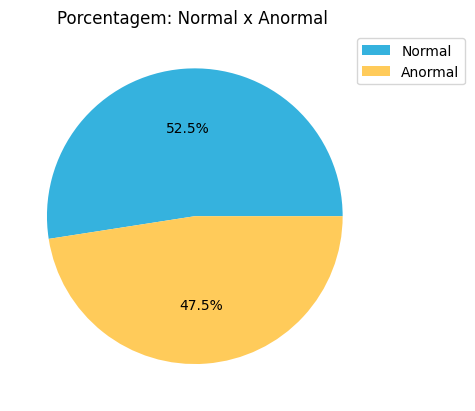

In [731]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

#### Dados teste

In [732]:
test_data = pd.read_csv("./data/test.csv")
data2 = pd.read_csv("./data/RHP_data.csv")

test_data = data2.merge(test_data, on="Id", how="right")


In [733]:
converter_numeric(test_data, "FC")
converter_numeric(test_data, "IDADE")

In [734]:
test_data["PA DIASTOLICA"] = fill_na_mediana(test_data, "PA DIASTOLICA")
test_data["PA SISTOLICA"] = fill_na_mediana(test_data, "PA SISTOLICA")
test_data["FC"] = fill_na_mediana(test_data, "FC")

In [735]:
test_data["Peso"] = fill_na_mediana(test_data, "Peso")
test_data["Altura"] = fill_na_mediana(test_data, "Altura")
test_data["IDADE"] = fill_na_mediana(test_data, "IDADE")

In [736]:
test_data["Peso"] = test_data["Peso"].replace(0, test_data["Peso"].median())

In [737]:
test_data["Altura"] = test_data["Altura"].replace(0, test_data["Altura"].median())

In [738]:
altura_invalida = test_data[test_data["Altura"] < 50]

test_data.loc[altura_invalida.index, "Altura"] = test_data["Altura"].median()

In [739]:
altura_aux = test_data["Altura"] / 100


test_data["IMC"] = test_data["Peso"] / np.power(altura_aux, 2)

In [740]:
test_data["PA RATE"] = (test_data["PA SISTOLICA"] - test_data["PA DIASTOLICA"]) 


In [741]:
test_data = test_data.drop(columns=["Atendimento", "DN", "Convenio"])

In [742]:
substituir(test_data, "PULSOS", "NORMAIS", "Normais")
substituir(test_data, "PULSOS", "AMPLOS", "Amplos")

In [743]:
substituir(test_data, "SOPRO", "sistólico", "Sistólico")
substituir(test_data, "SOPRO", "contínuo", "Contínuo")

In [744]:
substituir(test_data, "SEXO", "Masculino", "M")
substituir(test_data, "SEXO", "masculino", "M")

substituir(test_data, "SEXO", "Feminino", "F")

In [745]:
test_data["PULSOS"] = test_data["PULSOS"].fillna(test_data["PULSOS"].mode()[0])

In [746]:
test_data["B2"] = test_data["B2"].fillna(test_data["B2"].mode()[0])

In [747]:
test_data["SOPRO"] = test_data["SOPRO"].fillna(test_data["SOPRO"].mode()[0])

In [748]:
test_data["SEXO"] = test_data["SEXO"].fillna(test_data["SEXO"].mode()[0])

In [749]:
test_data["MOTIVO1"] = test_data["MOTIVO1"].fillna(test_data["MOTIVO1"].mode()[0])
test_data["MOTIVO2"] = test_data["MOTIVO2"].fillna(test_data["MOTIVO2"].mode()[0])

In [750]:
test_data["PPA"] = test_data["PPA"].replace("#VALUE!", np.nan)
test_data["PPA"] = test_data["PPA"].fillna(test_data["PPA"].mode()[0])

In [751]:
test_data["HDA 1"] = test_data["HDA 1"].fillna("Assintomático")
test_data["HDA2"] = test_data["HDA2"].fillna("Assintomático")

#### Encoder

In [752]:
from sklearn.preprocessing import LabelEncoder

In [753]:
colunas = [
    "PULSOS",
    "PPA",
    "B2",
    "SOPRO",
    "HDA 1",
    "HDA2",
    "SEXO",
    "MOTIVO1",
    "MOTIVO2",
    "CLASSE",
]

In [754]:
encoders_train = {}
for col in colunas:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    encoders_train[col] = le  # Armazenar o LabelEncoder para cada coluna

In [755]:
encoders_test = {}
for col in colunas[:-1]:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])
    encoders_test[col] = le

#### Normalização

In [756]:
from sklearn.preprocessing import StandardScaler

In [757]:
dados = pd.concat([train_data, test_data], axis=0)

ids = dados["Id"].to_numpy()
classes = dados["CLASSE"].to_numpy()

In [758]:
dados = dados.drop(columns=["Id", "CLASSE"])

In [759]:
scaler = StandardScaler()
dados_normalizados = pd.DataFrame(scaler.fit_transform(dados), columns=dados.columns)

#### K means

In [760]:
from sklearn.cluster import KMeans

In [761]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(dados_normalizados)

KMeans(n_clusters=2, random_state=42)

In [762]:
rotulos = kmeans.labels_
centroides = kmeans.cluster_centers_

In [763]:
dados_normalizados["CLUSTER"] = rotulos

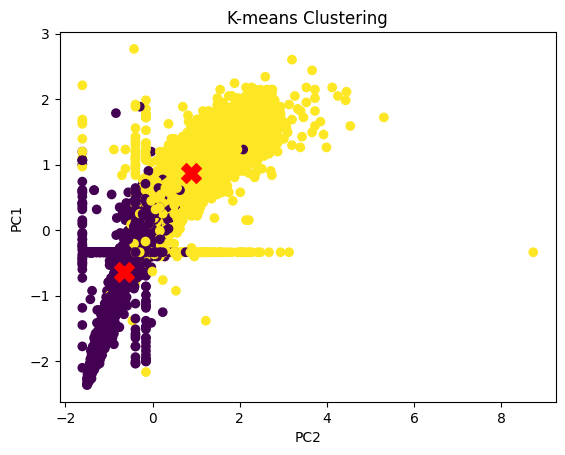

In [764]:
plt.scatter(
    dados_normalizados["Peso"],
    dados_normalizados["Altura"],
    c=dados_normalizados["CLUSTER"],
    cmap="viridis",
)
plt.scatter(centroides[:, 0], centroides[:, 1], s=200, c="red", marker="X")
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.title("K-means Clustering")
plt.show()

In [765]:
dados_normalizados["Id"] = ids
dados_normalizados["CLASSE"] = classes

#### Separação para treinamento

In [766]:
X = train_data.iloc[:, 1:-1]

y = train_data.iloc[:, -1]

X_test = test_data.iloc[:, 1:]

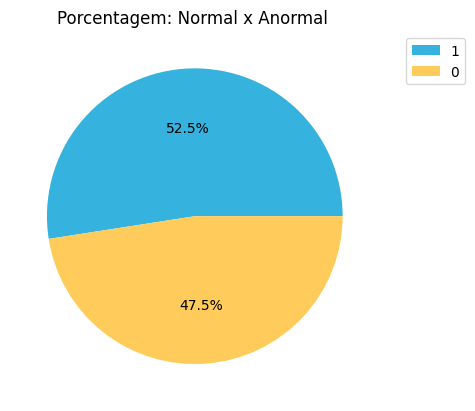

In [767]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [768]:
X_train = pd.DataFrame(train_data["Id"])

X_train = dados_normalizados[dados_normalizados["Id"].isin(X_train["Id"])]

In [769]:
X_test = pd.DataFrame(test_data["Id"])

X_test = dados_normalizados[dados_normalizados["Id"].isin(X_test["Id"])]

In [770]:
y = X_train["CLASSE"]
X = X_train.drop(columns=["Id", "CLASSE"])
X_t = X_test.drop(columns=["Id", "CLASSE"])

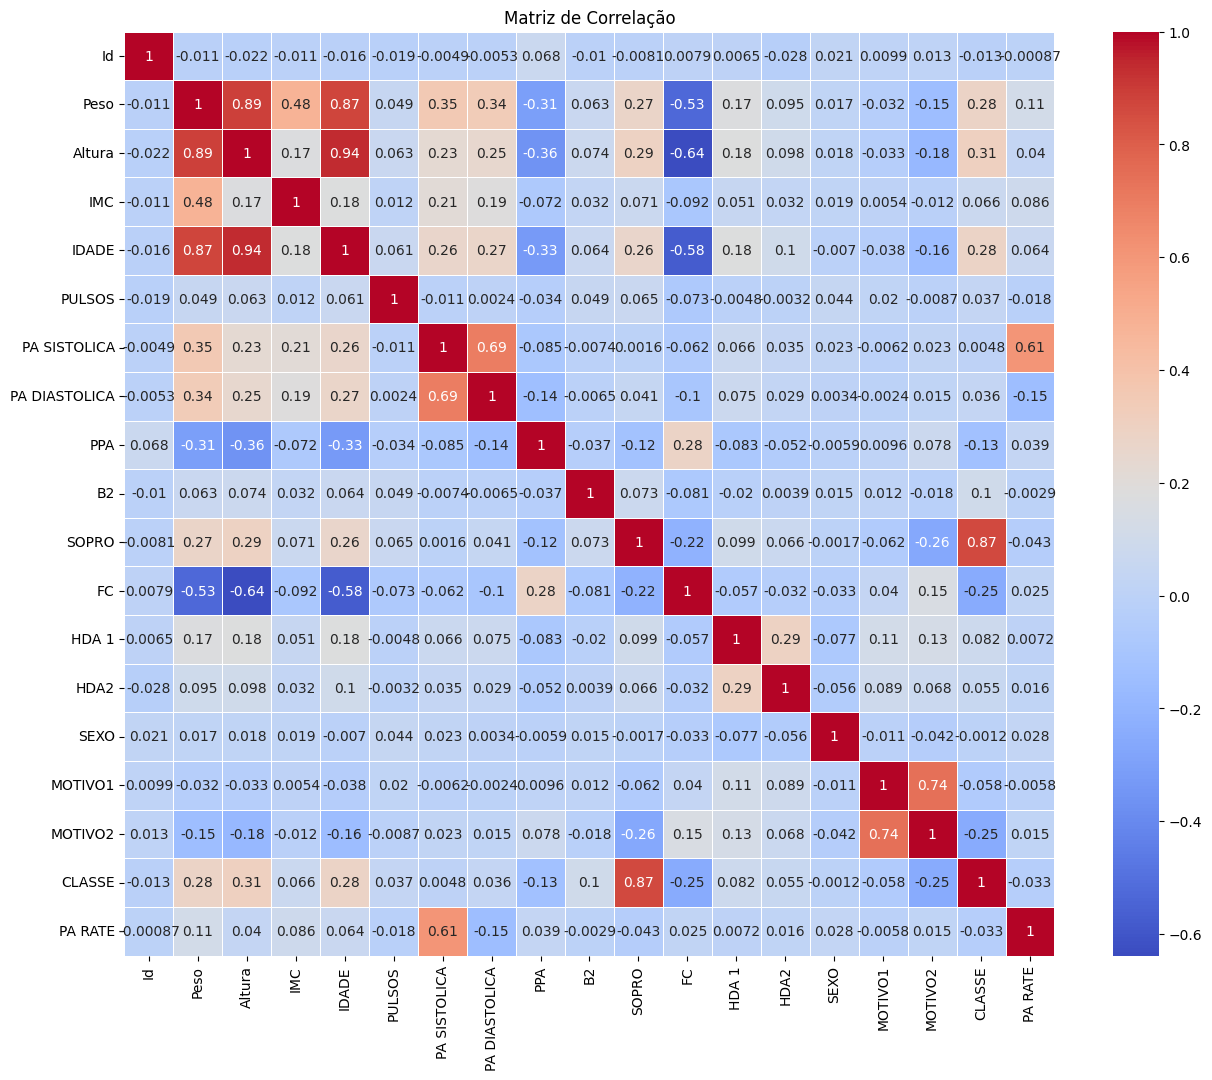

In [771]:
plotar_correlacao(train_data)

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [772]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [773]:
from sklearn.ensemble import RandomForestClassifier

In [774]:
weights = {0: 5, 1: 1}

In [775]:
model = RandomForestClassifier(class_weight=weights, n_estimators=300, random_state=42)

In [776]:
scores = cross_val_score(model, X, y, cv=10)

In [777]:
print(f"Pontuação média de acurácia: {scores.mean() * 100:.2f}%")
print(f"Desvio padrão da acurácia: {scores.std() * 100:.2f}%")

Pontuação média de acurácia: 93.56%
Desvio padrão da acurácia: 0.93%


In [778]:
for i in scores:
    print(f"{(i * 100):.2f}%")

93.17%
92.24%
92.55%
93.79%
93.79%
95.19%
94.57%
94.57%
92.70%
93.01%


(Sem normalização e K-means)<br>
Pontuação média de acurácia: 93.79%<br>
Desvio padrão da acurácia: 0.82%

Apenas com normalização <br>
Pontuação média de acurácia: 93.73% <br>
Desvio padrão da acurácia: 0.82%

Melhor até agora ! menos 92%s <br>
normalização + 2 clusters <br>
Pontuação média de acurácia: 93.74% <br>
Desvio padrão da acurácia: 0.85%

In [779]:
modelo_rf = RandomForestClassifier(n_estimators=300, random_state=42)

In [780]:
modelo_rf.fit(X,y)

RandomForestClassifier(n_estimators=300, random_state=42)

In [781]:
predicao_random_forest = modelo_rf.predict_proba(X_t)

In [782]:
resultado_pred_random_forest = pd.DataFrame(test_data["Id"], columns=["Id"])
resultado_pred_random_forest["Predicted"] = predicao_random_forest[:, 0]

display(resultado_pred_random_forest)

,Id,Predicted
0,8957,0.533333
1,4246,0.026667
2,9089,0.216667
3,10606,0.256667
4,9863,0.063333
...,...,...
3141,14053,0.126667
3142,9000,0.893333
3143,14643,0.966667
3144,15107,0.973333


In [783]:
resultado_pred_random_forest.to_csv(
    "./resultados/previsao_random_forest_nova_tentativa.csv", index=False
)

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.

In [784]:
from sklearn.model_selection import train_test_split

In [785]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [786]:
random_forest = RandomForestClassifier(class_weight=weights, n_estimators=100, random_state=42)

In [787]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 5, 1: 1}, random_state=42)

In [788]:
y_pred = random_forest.predict(X_test)

In [789]:
dados_errados = X_test[y_pred != y_test]

In [790]:
clusters = dados_errados.drop(columns=["CLUSTER"])
dados_errados = dados_errados.drop(columns=["CLUSTER"])

In [791]:
dados_errados = dados_errados * scaler.scale_ + scaler.mean_

In [792]:
dados_errados["CLASSE"] = (y_test[y_pred != y_test]).astype(int)

In [793]:

dados_errados["CLASSE PREV"] = 1 - dados_errados["CLASSE"]

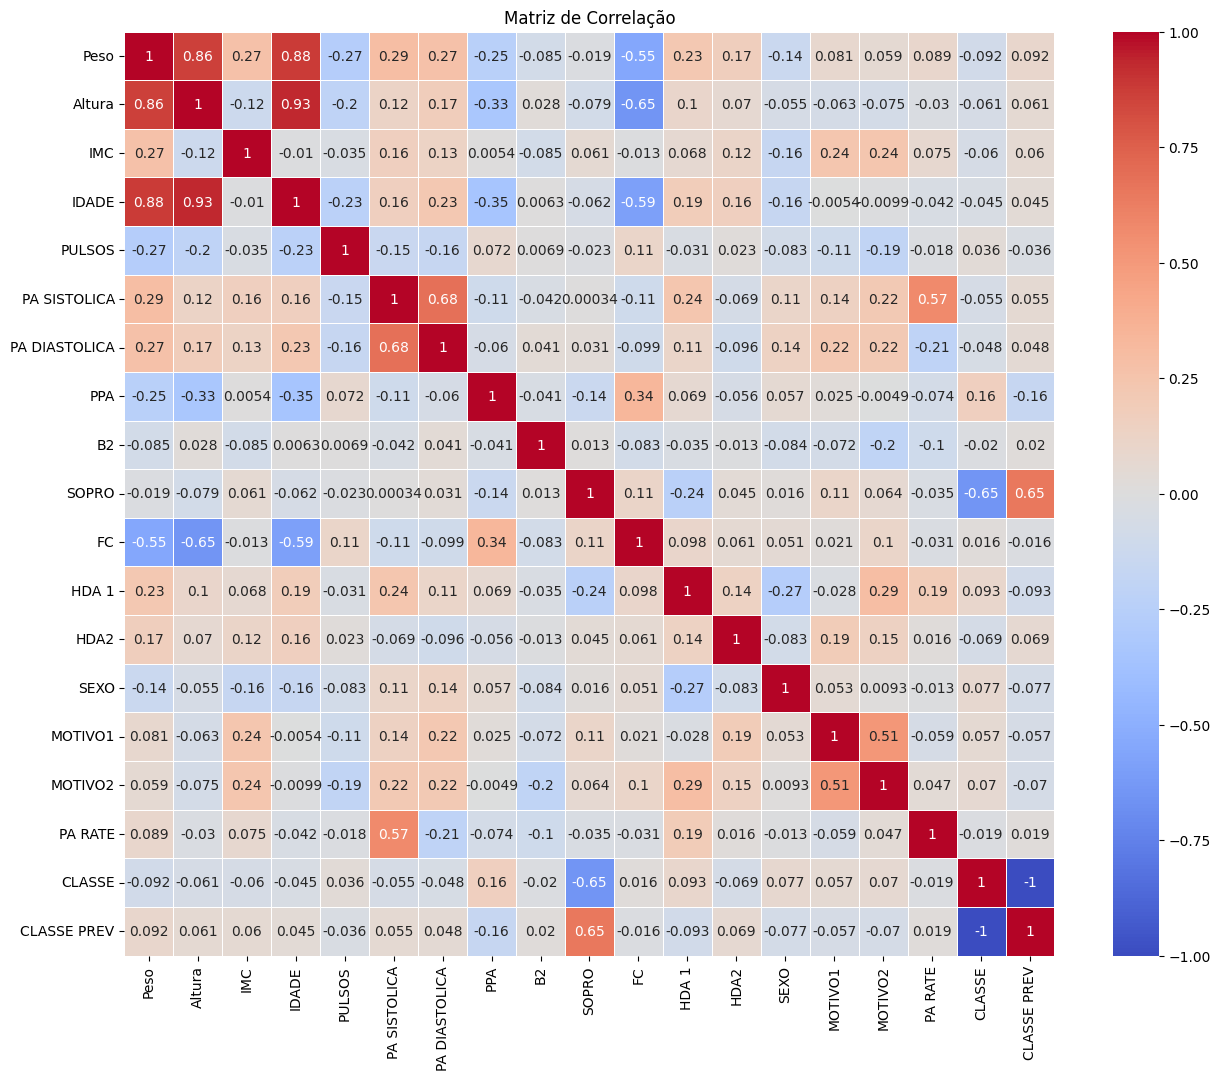

In [794]:
plotar_correlacao(dados_errados)

In [795]:
colunas = dados_errados.columns


for col in encoders_train:
    dados_errados[col] = encoders_train[col].inverse_transform(
        dados_errados[col].astype(int)
    )

In [796]:
dados_errados["CLASSE PREV"] = dados_errados["CLASSE PREV"].replace(
    {0: "Anormal", 1: "Normal"}
)

In [797]:
dados_errados.head(5)

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,PA RATE,CLASSE,CLASSE PREV
828,14.0,105.0,12.698413,4.06,Normais,100.0,50.0,Normal,Normal,ausente,120.0,Palpitacao,Assintomático,M,1 - Cardiopatia já estabelecida,6 - Palpitação/taquicardia/arritmia,50.0,Anormal,Normal
730,25.0,133.0,14.133077,1.95,Normais,90.0,55.0,Não Calculado,Normal,ausente,90.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Atividade física,35.0,Anormal,Normal
472,27.0,130.0,15.976331,10.01,Normais,100.0,70.0,Normal,Normal,ausente,90.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Atividade física,30.0,Anormal,Normal
1354,3.1,45.0,15.308642,0.09,Normais,100.0,60.0,Não Calculado,Normal,ausente,170.0,Palpitacao,Assintomático,M,2 - Check-up,5 - Cirurgia,40.0,Anormal,Normal
2018,10.6,83.0,15.386849,2.27,Normais,100.0,60.0,Não Calculado,Normal,ausente,100.0,Palpitacao,Assintomático,F,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,40.0,Anormal,Normal


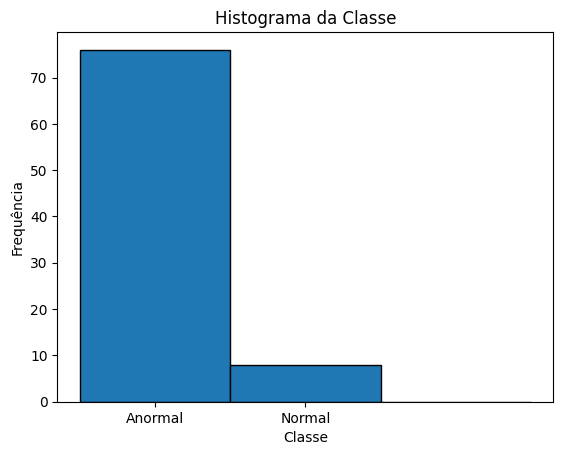

In [798]:
plt.hist(
    dados_errados["CLASSE"], bins=[-0.5, 0.5, 1.5, 2.5], edgecolor="black"
)  # Dividindo em 3 bins
plt.title("Histograma da Classe")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks([0, 1])  # Apenas 0 e 1 no eixo x
plt.show()

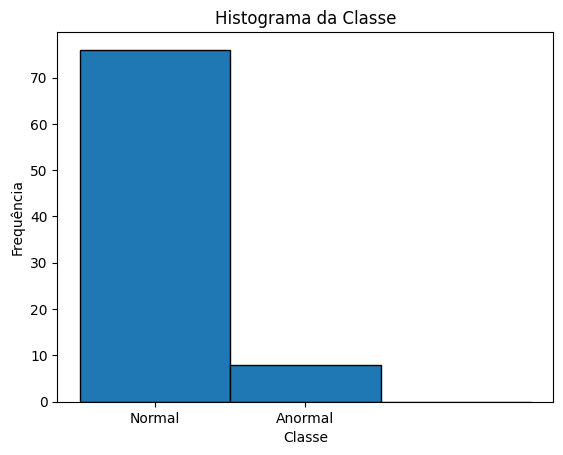

In [799]:
plt.hist(
    dados_errados["CLASSE PREV"], bins=[-0.5, 0.5, 1.5, 2.5], edgecolor="black"
)  # Dividindo em 3 bins
plt.title("Histograma da Classe")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks([0, 1])  # Apenas 0 e 1 no eixo x
plt.show()

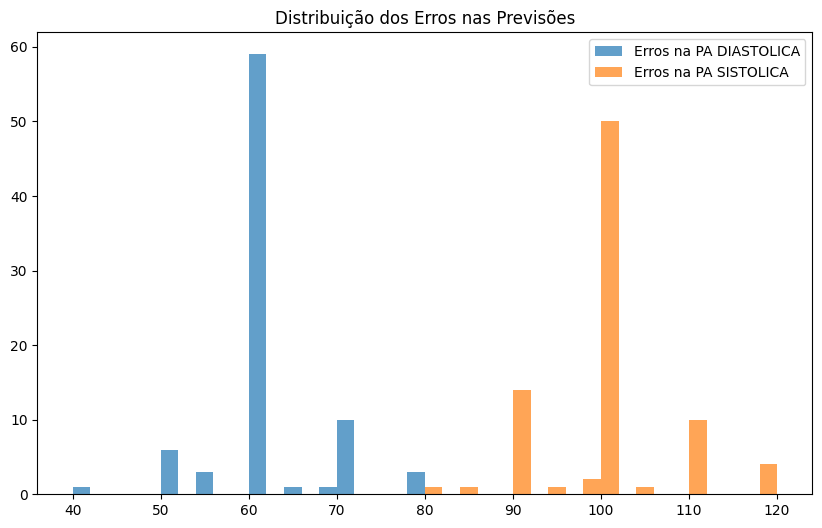

In [800]:
import matplotlib.pyplot as plt

# Filtrando os dados errados
erros = dados_errados[dados_errados["CLASSE PREV"] != dados_errados["CLASSE"]]

# Plotando a distribuição dos erros em um gráfico
plt.figure(figsize=(10, 6))
plt.hist(erros["PA DIASTOLICA"], bins=20, alpha=0.7, label="Erros na PA DIASTOLICA")
plt.hist(erros["PA SISTOLICA"], bins=20, alpha=0.7, label="Erros na PA SISTOLICA")
plt.legend()
plt.title("Distribuição dos Erros nas Previsões")
plt.show()

In [801]:
from sklearn.metrics import confusion_matrix

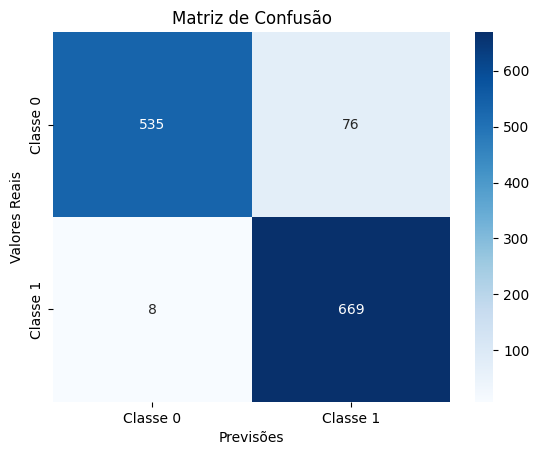

In [802]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Classe 0", "Classe 1"],
    yticklabels=["Classe 0", "Classe 1"],
)
plt.title("Matriz de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.show()